# Load Dataset

<AxesSubplot:title={'center':'Airline Passengers Over Time'}, xlabel='Period'>

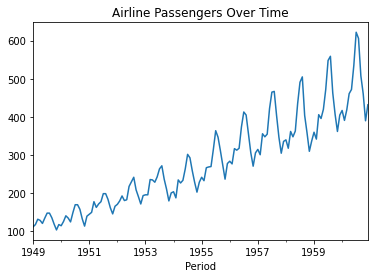

In [2]:
from sktime.datasets import load_airline

y = load_airline()

y.plot(title='Airline Passengers Over Time')

# Split y into Train and Test Groups

In [3]:
from sktime.forecasting.all import temporal_train_test_split

In [4]:
y_train, y_test = temporal_train_test_split(y)

In [5]:
y_train.index.min(), y_train.index.max()

(Period('1949-01', 'M'), Period('1957-12', 'M'))

In [6]:
y_test.index.min(), y_test.index.max()

(Period('1958-01', 'M'), Period('1960-12', 'M'))

# MA of ARIMA

In [7]:
from sktime.forecasting.arima import ARIMA

q is the last parameter of order and is the moving average

In [8]:
ma_model = ARIMA(order=(0,0,1))
ma_model.fit(y_train)
fh = list(range(1, 1+len(y_test)))
y_pred = ma_model.predict(fh=fh )

Plot the results where black is actual and the red is your prediction

<AxesSubplot:xlabel='Period'>

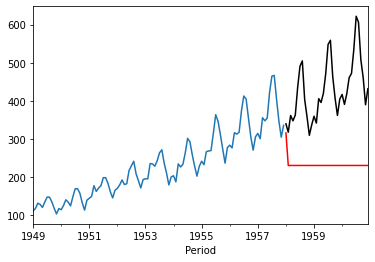

In [9]:
y_train.plot()
y_pred.plot(color='red')
y_test.plot(color = 'black')

# Evaluate yhat

In [10]:
from sktime.performance_metrics.forecasting import smape_loss

In [11]:
smape_loss(y_test, y_pred )

0.5717150945500831

# Try Higher Orders

SMAPE: 0.567825452415578


<AxesSubplot:xlabel='Period'>

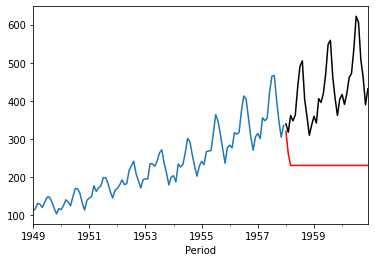

In [12]:
ma2_model = ARIMA(order=(0,0,2))
ma2_model.fit(y_train)
fh = list(range(1,1+len(y_test)))
y_pred = ma2_model.predict(fh=fh)
smape = smape_loss(y_test, y_pred)
print(f'SMAPE: {smape}')
y_train.plot()
y_pred.plot(color='red')
y_test.plot(color = 'black')

# Try a different dataset

<AxesSubplot:title={'center':'Lynx Trappings Over Time'}, xlabel='Period'>

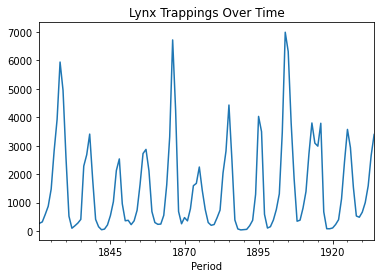

In [13]:
from sktime.datasets import load_lynx
y=load_lynx()
y.plot(title='Lynx Trappings Over Time')

# Split y into Train and Test Groups

In [14]:
from sktime.forecasting.all import temporal_train_test_split

In [15]:
y_train, y_test = temporal_train_test_split(y)

In [16]:
y_train.index.min(), y_train.index.max()

(Period('1821', 'A-DEC'), Period('1905', 'A-DEC'))

In [17]:
y_test.index.min(), y_test.index.max()

(Period('1906', 'A-DEC'), Period('1934', 'A-DEC'))

# MA of ARIMA

In [18]:
from sktime.forecasting.arima import ARIMA

p is the lags in the autoregression and is the first parameter of the order

In [19]:
ma_model = ARIMA(order=(0,0,1))

In [20]:
ma_model.fit(y_train)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(order=(0, 0, 1))

In [21]:
fh = list(range(1, 1+len(y_test)))

In [22]:
y_pred = ma_model.predict(fh=fh )

Plot the results where blue is actual and the red is your prediction

<AxesSubplot:xlabel='Period'>

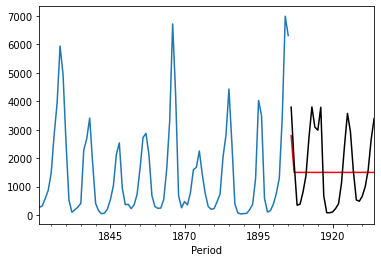

In [23]:
y_train.plot()
y_pred.plot(color='red')
y_test.plot(color = 'black')

# Try Higher Orders

SMAPE: 0.816355314402704


<AxesSubplot:xlabel='Period'>

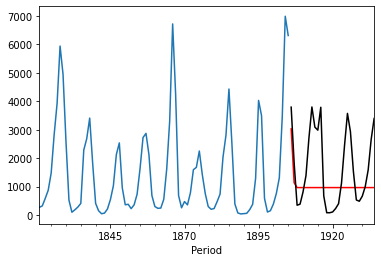

In [24]:
ma2_model = ARIMA(order=(0,0,2))
ma2_model.fit(y_train)
fh = list(range(1,1+len(y_test)))
y_pred = ma2_model.predict(fh=fh)
smape = smape_loss(y_test, y_pred)
print(f'SMAPE: {smape}')
y_train.plot()
y_pred.plot(color='red')
y_test.plot(color = 'black')